# Programming for Data Science - 21KHDL1
# Final Project
# Topic:

## Student Information 
| MSSV     | Họ tên          |
| -------- | --------------- |
| 21120570 | Đặng Nguyễn Thanh Tín |
| 21120574 | Nguyễn Minh Trí |
| 21120580 | Trần Thị Kim Trinh |

## Table of contents
- [Overview](#overview)
- [Data Collection](#data-collection)
- [Data Pre-processing and Exploration](#data-pre-processing-and-exploration)
- [Quick view of Data](#quick-view-of-data)
- [Questions](#questions)
- [Reflection](#reflection)
- [References](#references)


# Overview

The Kaggle dataset on drug-related deaths from 2012-2018 provides comprehensive health-related information, encompassing various factors such as drug categories, demographics including gender and age, and the geographical context of fatalities. Despite its age, this data serves as a crucial resource for comprehending the drug issue and proposing preventative measures. Analyzing the dataset can pinpoint trends and factors contributing to fatalities, supporting prevention and treatment efforts. This presents an opportunity to address the public health challenge and formulate effective anti-drug strategies.

Libraries used

In [48]:
#import những gì bạn cần ở đây
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# 1. Data Collection

**The Connecticut Deaths due to Drugs Dataset** contains information about **5105** people who died due to drug overdose between **2012 and 2018** in Connecticut, US.

The dataset includes data related to the age, race, gender, place of residence of the victims as well as the drugs they overdosed on. This information can be used to understand if drug use is prevalent in a specific area or city, drug use by individuals of different age groups and races as well as the popularity of different types of drugs.

The dataset has **41 columns** and **5105 rows**. The file have the following columns:
1. `ID`: ID of Patient
2. `Date`: The time which Patient died 
3. `DateType`: Type of Date in Column 2 [Date of Reporting or Date of Death]
4. `Age`: Age of Patient
5. `Sex`: Sex of Patient
6. `Race`: Race of Patient
7. `ResidenceCity`: City of Residence
8. `ResidenceCounty`: County of Residence
9. `ResidenceState`: State of Residence
10. `DeathCity`: City of Death
11. `DeathCounty`: County of Death
12. `Location`: Location of Death [Hospital or Residence]
13. `LocationifOther`: Location of Death if Not Hospital or Residence
14. `DescriptionofInjury`: Cause of Death
15. `InjuryPlace`: Place of Event that caused Death
16. `InjuryCity`: City of Event that caused Death
17. `InjuryCounty`: County of Event that caused Death
18. `InjuryState`: State of Event that caused Death
19. `COD`: Detailed Cause of Death
20. `OtherSignifican`: Other Significant Injuries that may have lead to Death
21. `Heroin`: Drug Found in Body [Y/N] liệu heroin đã được phát hiện trong mẫu từ những trường hợp tử vong hay không?
22. `Cocaine`: Drug Found in Body [Y/N]
23. `Fentanyl`: Drug Found in Body [Y/N]
24. `FentanylAnalogue`: Drug Found in Body [Y/N]
25. `Oxycodone`: Drug Found in Body [Y/N]
26. `Oxymorphone`: Drug Found in Body [Y/N]
27. `Ethanol`: Drug Found in Body [Y/N]
28. `Hydrocodone`: Drug Found in Body [Y/N]
29. `Benzodiazepine`: Drug Found in Body [Y/N]
30. `Methadone`: Drug Found in Body [Y/N]
31. `Amphet`: Drug Found in Body [Y/N]
32. `Tramad`: Drug Found in Body [Y/N]
33. `Morphine_NotHeroin`: Drug Found in Body [Y/N]
34. `Hydromorphone`: Drug Found in Body [Y/N]
35. `Other`: Drug Found in Body [Y/N]
36. `OpiateNOS`: Drug Found in Body [Y/N]
37. `AnyOpioid`: Drug Found in Body [Y/N]
38. `MannerofDeath`: Manner of Death
39. `DeathCityGeo`: City of Death
40. `ResidenceCityGeo`: City of Residence
41. `InjuryCityGeo`: City of Injury

# 2. Data Pre-processing

## 2.0 Take a quick view of our data

 **Read Data**

In [49]:
# Đọc dữ liệu từ ./Accidental Drug Related Deaths in Connecticut-2012-2018 và lưu vào DrugDeath_df
DrugDeath_df = pd.read_csv('./Data/Accidental_Drug_Related_Deaths_2012-2022.csv')

DrugDeath_df.head(5)

Date      Date Type   Age     Sex                       Race  \
0  12/31/2022  Date of death  54.0    Male                      White   
1  12/31/2022  Date of death  61.0  Female                      White   
2  12/31/2022  Date of death  54.0    Male                      White   
3  12/30/2022  Date of death  48.0    Male                      White   
4  12/29/2022  Date of death  41.0  Female  Black or African American   

  Ethnicity Residence City Residence County Residence State  Injury City  ...  \
0       NaN       OAKVILLE       LITCHFIELD              CT    WATERBURY  ...   
1       NaN        LEBANON       NEW LONDON              CT  WILLIMANTIC  ...   
2       NaN     WEST HAVEN        NEW HAVEN              CT   WEST HAVEN  ...   
3       NaN         SOMERS          TOLLAND              CT       SOMERS  ...   
4       NaN     BRIDGEPORT        FAIRFIELD              CT   BRIDGEPORT  ...   

  Xylazine Gabapentin Opiate NOS Heroin/Morph/Codeine   Other Opioid  \
0      NaN        NaN        NaN                  NaN            NaN   
1        Y        NaN        NaN                  NaN            NaN   
2      NaN        NaN        NaN                    y            NaN   
3      NaN        NaN        NaN                  NaN  Buprenorphine   
4      NaN          Y        NaN                  NaN            NaN   

  Any Opioid          Other  \
0        NaN            NaN   
1          Y            NaN   
2          Y            NaN   
3          Y  Buprenorphine   
4          Y            NaN   

                                    ResidenceCityGeo  \
0  OAKVILLE, CT\r\n(41.58854000000008, -73.086909...   
1  LEBANON, CT\r\n(41.64541000000003, -72.2009799...   
2  WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...   
3  SOMERS, CT\r\n(41.98825000000005, -72.44012999...   
4  BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...   

                                       InjuryCityGeo  \
0  WATERBURY, CT\r\n(41.55490000000003, -73.04646...   
1  WILLIMANTIC, CT\r\n(41.71096000000006, -72.205...   
2  WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...   
3  SOMERS, CT\r\n(41.98825000000005, -72.44012999...   
4  BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...   

                                    DeathCityGeo  
0  CT\r\n(41.57350273000003, -72.73830590799997)  
1  CT\r\n(41.57350273000003, -72.73830590799997)  
2  CT\r\n(41.57350273000003, -72.73830590799997)  
3  CT\r\n(41.57350273000003, -72.73830590799997)  
4  CT\r\n(41.57350273000003, -72.73830590799997)  

[5 rows x 48 columns]

**How many rows and how many columns?**

In [50]:
# Lưu số dòng của DrugDeath_df vào n_rows và số cột của DrugDeath_df vào n_cols
n_rows, n_cols = DrugDeath_df.shape

# In ra màn hình số dòng và số cột của DrugDeath_df
print(f'({n_rows}, {n_cols})')

(10654, 48)


**What is the meaning of each row?**

Each row in this dataset represents information about an individual who passed away due to a drug overdose. Specifically:

<li><b>Demographic Information</b>: Age, gender, race, residential address.</li>
<li><b>Death Information</b>: Date of death, location of death, cause of death, manner of death.</li>
<li><b>Drug-related Information</b>: Presence of specific drugs in the body.</li>

**What is the meaning of each column?**

- The data columns is crucial for effective analysis. By carefully examining the column titles and their respective data entries, we can decipher the information they encapsulate. Given the extensive length of the column titles, renaming them for easier handling and analysis becomes essential.

- Through a thorough review of the column titles and their contents, aligned with the context of the survey questionnaire, we can gain a comprehensive understanding of the dataset. This process will enable us to effectively rename the columns, simplifying them for easier manipulation and analysis in subsequent steps.

- The columns in this dataset provide information about emergency cases due to drug overdoses.

Chọn ra các cột sẽ dùng + giải thích lí do

In [51]:
DrugDeath_df.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

In [52]:
DrugDeath_df = DrugDeath_df[['Date', 'Age', 'Sex', 'Race',
        'Location', 'Cause of Death', 'Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'ResidenceCityGeo',
       'DeathCityGeo']]

## 2.1 Are there duplicated rows?

In [53]:
# Kiểm tra các dòng bị trùng lặp
duplicate_rows = DrugDeath_df[DrugDeath_df.duplicated()]

# Hiển thị nếu có dòng bị trùng lặp
if duplicate_rows.shape[0] > 0:
    print("There are duplicated rows.")
    # Xóa các dòng trùng lặp
    DrugDeath_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


**Conclusion:** We can see that the dataset doesn't have duplicated rows.

## 2.2 Data type & missing values

### 2.2.1 Datatype

In [54]:
# Kiểm tra kiểu dữ liệu hiện tại của các cột
print(DrugDeath_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10654 non-null  object 
 1   Age                    10652 non-null  float64
 2   Sex                    10645 non-null  object 
 3   Race                   10625 non-null  object 
 4   Location               10632 non-null  object 
 5   Cause of Death         10654 non-null  object 
 6   Heroin                 3472 non-null   object 
 7   Cocaine                3855 non-null   object 
 8   Fentanyl               6925 non-null   object 
 9   Fentanyl Analogue      804 non-null    object 
 10  Oxycodone              950 non-null    object 
 11  Oxymorphone            157 non-null    object 
 12  Ethanol                2878 non-null   object 
 13  Hydrocodone            163 non-null    object 
 14  Benzodiazepine         2499 non-null   object 
 15  Me

Most columns have the correct data types, with a few exceptions:

- The **Date** column should have the data type of Datetime.
- **Age** should have the data type of int instead of float.
- Columns such as **Heroin, Cocaine, Fentanyl, etc.,** which confirm the presence or absence of each toxic substance, should have a data type of bool instead of object.

In [55]:
#Chuyển cột Date thành datetime
DrugDeath_df['Date'] = pd.to_datetime(DrugDeath_df['Date'], format='%m/%d/%Y')

Ta sẽ xem xét các cột nên có kiểu dữ liệu boolean

In [56]:
#Xem các giá trị có trong các cột
drugs = ['Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine']

for col in drugs: 
    print(col)
    print(DrugDeath_df[col].unique())

Heroin
[nan 'Y']
Cocaine
['Y' nan]
Fentanyl
[nan 'Y' 'Y (PTCH)' 'Y POPS']
Fentanyl Analogue
[nan 'Y']
Oxycodone
[nan 'Y']
Oxymorphone
[nan 'Y']
Ethanol
[nan 'Y' 'P']
Hydrocodone
[nan 'Y']
Benzodiazepine
[nan 'Y']
Methadone
[nan 'Y']
Meth/Amphetamine
[nan 'Y']
Amphet
[nan 'Y']
Tramad
[nan 'Y']
Hydromorphone
[nan 'Y']
Morphine (Not Heroin)
[nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']
Xylazine
[nan 'Y']
Gabapentin
[nan 'Y' 'y']
Opiate NOS
[nan 'Y']
Heroin/Morph/Codeine
[nan 'y' 'Y']


In this context, treating `NaN` and `N` as equivalent is justified since there is no evidence indicating the presence of the tested substance in the victim's body. Consequently, we can replace occurrences of `NaN` with `N` in these columns.

Before converting these columns to a boolean type, special values need to be addressed. Specifically, we need to handle values other than True (Y) and False (N or NaN) in these columns. The majority of columns exhibit a standard pattern with only 'Y', 'N', and 'NaN', but there are a few exceptions.

- **Other Opioid:** Includes values [nan 'Buprenorphine' 'MDMA, Buprenorphine' 'Mitragynine' 'ketamine' 'PCP' 'Difluro' 'pcp' 'Y']. Since this column represents the presence of other addictive substances, we can treat answers like 'Buprenorphine' 'MDMA, Buprenorphine', ... as 'Y'.

- **Morphine (Not Heroin):** [nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']. Firstly, let's examine the meaning of special values:
    - `PCP NEG`: Indicates a negative result for PCP, unrelated to Heroin. Treat as 'Y'.
    - `NO RX BUT STRAWS`: Indicates the absence of a prescription but presence of straws, likely unrelated to Heroin. Treat as 'Y'.
    - `STOLE MEDS`: Indicates stolen medication, unrelated to Heroin. Treat as 'Y'. 
    --> Therefore, this column can be considered 'Y' for these special cases.

- **Fentanyl:** [nan 'Y' 'Y (PTCH)' 'Y POPS']
    - `Y PTCH`: Fentanyl detected in patch form.
    - `Y POPS`: Fentanyl detected in candy form.
    Treat these values as 'Y'.

In conclusion, a common approach for all columns can be formulated as follows:

In [57]:
#chuyển thành kiểu boolean (null hoặc 'N' là False, còn lại là True)
for col in drugs: 
    DrugDeath_df[col] = DrugDeath_df[col].notnull() & (DrugDeath_df[col] != 'N')

### 2.2.3 Handle missing value

- With each column, how are missing values distributed?
- What is the percentage of missing values?
- How many different values? Are they abnormal?

#### Firstly, let's examine the number of missing values in each column.

In [58]:
missing_values = DrugDeath_df.isnull().sum().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(
    y=missing_values.index,
    x=missing_values.values,
    orientation='h',
    marker_color='#1f77b4'
)])

fig.update_layout(
    title_text='Số lượng giá trị bị thiếu của mỗi cột',
    xaxis_title='Số lượng giá trị bị thiếu',
    yaxis_title='Tên cột',
    yaxis={'autorange': 'reversed'},
    height=800
)

fig.show()


#### Secondly, handle them

- In this process, i will use **Imputation**.
    - For categorical data, mode (the most frequent value) is often used. 
    - For numerical data, mean or median can be used depending on the data distribution.

In [59]:
categorical_cols = DrugDeath_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = DrugDeath_df.select_dtypes(include=['int64', 'float64']).columns

missing_categorical_cols = [col for col in categorical_cols if DrugDeath_df[col].isnull().any()]
missing_numerical_cols = [col for col in numerical_cols if DrugDeath_df[col].isnull().any()]

print("Categorical columns with missing values:")
print(missing_categorical_cols)

print("\nNumerical columns with missing values:")
print(missing_numerical_cols)

Categorical columns with missing values:
['Sex', 'Race', 'Location', 'ResidenceCityGeo', 'DeathCityGeo']

Numerical columns with missing values:
['Age']


In [60]:
#Xử lí Age, Sex, Location, Race bằng cách điền median và mode
# For numerical columns
DrugDeath_df['Age'] = DrugDeath_df['Age'].fillna(DrugDeath_df['Age'].median())
DrugDeath_df['Age'] = DrugDeath_df['Age'].astype(int)

# For categorical columns
for col in missing_categorical_cols:
    DrugDeath_df[col] = DrugDeath_df[col].fillna(DrugDeath_df[col].mode()[0])

Let's double-check to see if there are any remaining columns with missing values.

In [61]:
missing_cols = DrugDeath_df.columns[DrugDeath_df.isnull().any()].tolist()

print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
[]


### 2.2.4 Handle abnormal value 

- In the column `Cause of Death`, there are values like: 
    - **Acetyl Fentanyl**, those values belong to `Fentanyl Analogue` column.
    - **Tramadol** belongs to the `Tramad` column, and there are some abnormal cases like that.
- For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into
`"Fentanyl, Xylazine, Cocaine, Tramadol"`.

- How i solve this issue?
    - Step 1: remove unwanted words, like: "Acute Intoxication due to the Combined Effects of" , "and", etc.
    - Step 2: create a new column `Details Cause` from drugs' name in the `Cause of Death` to help out later work easier.
        - For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into `"Fentanyl, Xylazine, Cocaine, Tramadol"`.





#### Step 1: Remove unnecessary words.

In [62]:
# rename 'Cause of Death' into COD for more convienient

DrugDeath_df = DrugDeath_df.rename(columns={'Cause of Death': 'COD'})

#Tạo cột mới chứa ds các thuốc là nguyên nhân trục tiếp gây tử vong
# Đổi tên cột 'Cause of Death' thành 'COD'
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.lower()

# Loại bỏ các từ không mong muốn
unwanted_words = ['from the', 'complications', ' of ', 'toxicity associated with', 'intoxiation', 'multidrug', 'toxicity' ,'including', 'chronic substance abuse'
    'acute intoxication by the combined effects of','effects', 'toxicities','combined','intoxication', 'acute', 'due to' ,'the', 'combined effects of', 'combined drug toxicity', 'multi-drug', 'following','chronic substance use','(',')']
for word in unwanted_words:
    DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace(word, '')

# Thay thế 'and' bằng ','
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('and', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('  ', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('/', ',')



#### Step 2: Create column `Details Cause` 

- First, find column name that match with the drug in `COD`.

In [63]:
# Lấy các giá trị duy nhất từ cột 'COD'
drug_column = DrugDeath_df.columns[8:-3]
drug_column

Index(['Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS'],
      dtype='object')

Create a new column from COD , to categorize value in COD to match with the drug columns

In [64]:
import pandas as pd
import numpy as np

# List of drugs
drugs = ['Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone','Amphetamine',
       'Tramadol', 'Hydromorphone', 'Morphine',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin','Codeine']

def remove_dup(df, column):
    df[column] = df[column].apply(lambda x: ', '.join(sorted(set(str(x).split(', ')))))
    return df

# Function to find drugs in 'COD' and add them to 'Details Cause'
def find_drugs(row):
    details_cause = []
    for drug in drugs:
        if drug.lower() in row['COD'].lower() or (drug.lower() + 's') in row['COD'].lower():
            details_cause.append(drug)
    if 'alcohol' in row['COD'].lower():
        details_cause.append('Ethanol')
    if 'fentanyl' in row['COD'].lower():
        details_cause.append('Fentanyl')
    if 'opiates' in row['COD'].lower() or 'opiate' in row['COD'].lower() :
        details_cause.append('Opiate NOS')
    if any(word.strip() in ['fentanyl', 'Fentanyl'] for word in row['COD'].split(',')):
        details_cause.append('Fentanyl Analogue')
    if not details_cause:
        details_cause.append('Other')
        return ''.join(details_cause)
    return ', '.join(details_cause)

# Apply the function to the 'COD' column
DrugDeath_df['Details Cause'] = DrugDeath_df.apply(find_drugs, axis=1)
DrugDeath_df = remove_dup(DrugDeath_df, 'Details Cause')

# 3. Data Exploration

## 3.1 How are values distributed? 

### 3.1.1 With number columns, how are values distributed?

In [65]:

DrugDeath_df['Age'].describe()

count    10654.000000
mean        43.515206
std         12.600651
min         13.000000
25%         33.000000
50%         43.000000
75%         54.000000
max         87.000000
Name: Age, dtype: float64

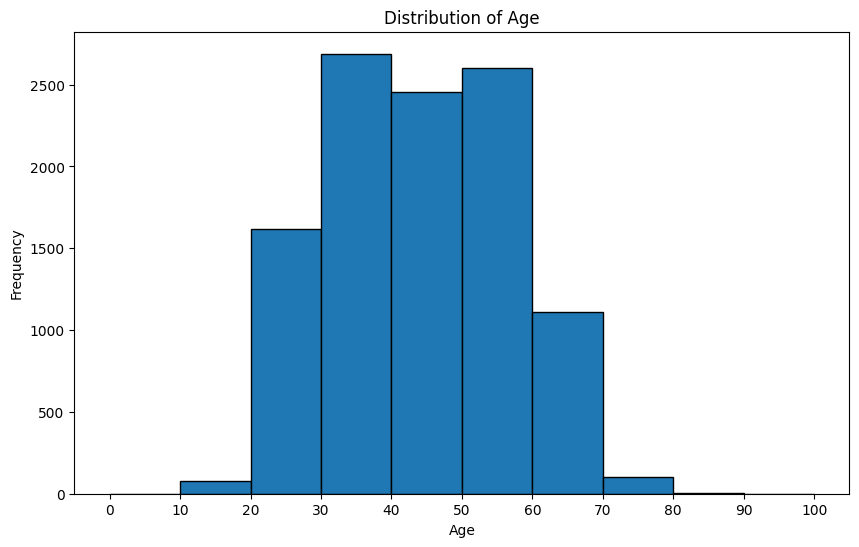

In [66]:
num_bins = int(np.sqrt((DrugDeath_df['Age'].nunique())))

plt.figure(figsize=(10,6))
plt.hist(DrugDeath_df['Age'],bins=range(0, 101, 10), edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.xticks(range(0, 101, 10))
plt.ylabel('Frequency')
plt.show()


### 3.1.2 With categorical columns, how are values distributed?

For the columns Sex, and Race, let's create pie charts to visualize the distribution of values.

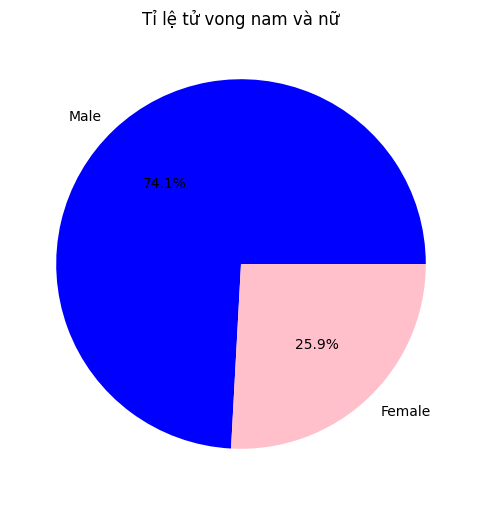

In [67]:
# Đếm số lượng nam và nữ
sex_counts = DrugDeath_df['Sex'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Tỉ lệ tử vong nam và nữ')
plt.show()

We will calculate the ratio of males to females in the data to gain a more objective perspective.

In [68]:
# Tính tỷ lệ tử vong giữa nam và nữ
male_deaths = sex_counts['Male']
female_deaths = sex_counts['Female']
death_ratio = male_deaths / female_deaths
print(f"The male-to-female death ratio.: {death_ratio:.2f}")

The male-to-female death ratio.: 2.87


We will create a bar chart to visualize the frequency of each drug found in the bodies of the victims.

In [69]:
#LẶp qua tất cả các cột thuốc, vì đây là boolean nên chỉ cần dùng .sum() để đếm số lượng True
drugs_found = DrugDeath_df[drug_column].sum().sort_values(ascending=False)
drugs_found 

# Chuyển đổi Series thành DataFrame để vẽ biểu đồ
drugs_found_df = drugs_found.reset_index()
drugs_found_df.columns = ['Drug', 'Count']

# Vẽ biểu đồ cột
fig = px.bar(drugs_found_df, x='Drug', y='Count', title='Số lượng bệnh nhân', color_discrete_sequence=['steelblue'])
fig.show()

For the column indicating the cause of death, we will examine how many victims were directly related to each type of drug.

In [70]:
# value count for each name of drug in each row

def count_drug_frequency(df, column):
    # Split the column into separate drugs
    df[column] = df[column].str.split(',')

    # Expand the lists into separate rows
    df = df.explode(column)

    # Strip leading/trailing whitespace
    df[column] = df[column].str.strip()

    # Count the frequency of each drug
    drug_counts = df[column].value_counts()

    return drug_counts

drug_counts = count_drug_frequency(DrugDeath_df, 'Details Cause')

# Chuyển đổi Series thành DataFrame để vẽ biểu đồ
drug_counts_df = drug_counts.reset_index()
drug_counts_df.columns = ['Drug', 'Count']

# Vẽ biểu đồ cột
fig = px.bar(drug_counts_df, x='Drug', y='Count', title='Tần suất xuất hiện của từng loại thuốc', color_discrete_sequence=['steelblue'])
fig.show()




## 3.2 The correlation between "Age" and "Types of drugs"

### Step 1: Calculating correlation coefficients

In [71]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Tạo một dictionary để lưu trữ hệ số tương quan giữa 'Age' và các thuốc
correlations = {}

# Lặp qua từng cột thuốc và tính toán tương quan
for column in df_copy.columns:
    if df_copy[column].dtype == bool:  # Chỉ xem xét các cột dạng boolean
        correlation = df_copy['Age'].corr(df_copy[column].astype(int), method='pearson')
        correlations[column] = correlation

# In ra các hệ số tương quan
for drug, correlation in correlations.items():
    print(f"Correlation between Age and {drug}: {correlation}")


Correlation between Age and Heroin: -0.07954282704926738
Correlation between Age and Cocaine: 0.05854990200908166
Correlation between Age and Fentanyl: -0.06838742937376589
Correlation between Age and Fentanyl Analogue: -0.005477558063258838
Correlation between Age and Oxycodone: 0.08755426001543642
Correlation between Age and Oxymorphone: 0.018430006763438842
Correlation between Age and Ethanol: 0.07229435752075965
Correlation between Age and Hydrocodone: 0.06154210067710383
Correlation between Age and Benzodiazepine: 0.018169514531857063
Correlation between Age and Methadone: 0.07257838402874137
Correlation between Age and Meth/Amphetamine: -0.041968240147605466
Correlation between Age and Amphet: -0.05156026157960707
Correlation between Age and Tramad: 0.058117124313291635
Correlation between Age and Hydromorphone: 0.030105710979642347
Correlation between Age and Morphine (Not Heroin): 0.0302137338762264
Correlation between Age and Xylazine: 0.02814084981759481
Correlation between A

### Step 2: Visualize by heatmap

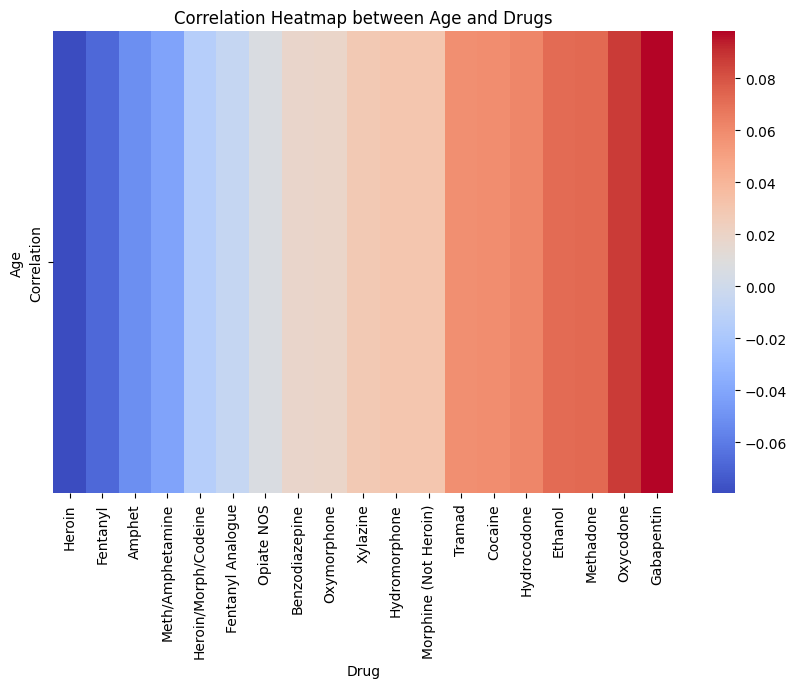

In [72]:
# Chuyển đổi dictionary thành DataFrame để vẽ biểu đồ
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Drug', 'Correlation'])

# Sắp xếp DataFrame theo giá trị tăng dần của hệ số tương quan
correlation_df = correlation_df.sort_values(by='Correlation')

# Tạo DataFrame có chỉ số là tên thuốc và cột là 'Age' và giá trị là hệ số tương quan
heatmap_data = correlation_df.set_index('Drug').T
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap between Age and Drugs')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.show()

**Nhận xét:**
- Ma túy có mức tương quan tiêu cực nhẹ hơn (màu xanh nhạt) bao gồm: Amphet và Meth/Amphetamine.
- Gabapentin có mức tương quan tích cực mạnh nhất với tuổi tác (màu đỏ sẫm), có nghĩa là loại ma túy này có thể được sử dụng nhiều hơn bởi những người lớn tuổi.
- Các loại ma túy khác như Cocaine, Methadone, và Hydrocodone cũng cho thấy một mức độ tương quan tích cực nhẹ hơn (màu đỏ nhạt).

## 3.3 Which are the top 5 cities with the highest number of deaths?

### Step 1: Top 5 cities with the highest death counts

In [73]:
# Tạo bản sao dataframe
DrugDeath_df_copy = DrugDeath_df.copy()

# Lấy 5 thành phố có số lượng tử vong cao nhất
top_cities = DrugDeath_df_copy['DeathCityGeo'].value_counts().head(5)

print(top_cities)

DeathCityGeo
CT\r\n(41.57350273000003, -72.73830590799997)    1453
Hartford, CT\r\n(41.765775, -72.673356)          1083
New Haven, CT\r\n(41.308252, -72.924161)          765
Waterbury, CT\r\n(41.554261, -73.043069)          728
Bridgeport, CT\r\n(41.179195, -73.189476)         625
Name: count, dtype: int64


### Step 2: Visualize

In [74]:
# Lọc dữ liệu cho 5 thành phố có số lượng tử vong cao nhất
top_cities_data = DrugDeath_df_copy[DrugDeath_df_copy['DeathCityGeo'].isin(top_cities.index)]

# Tách dữ liệu về vĩ độ (latitude) và kinh độ (longitude) từ cột 'DeathCityGeo'
lat_lon = top_cities_data['DeathCityGeo'].str.extract(r'\(([-+]?\d+\.\d+), ([-+]?\d+\.\d+)\)')

# Xử lý ngoại lệ: Nếu không tìm thấy tên thành phố, đặt là 'Noname'
top_cities_data['City'] = top_cities_data['DeathCityGeo'].str.extract(r'\s(.*),').fillna('Noname')

top_cities_data['Latitude'] = lat_lon[0].astype(float)
top_cities_data['Longitude'] = lat_lon[1].astype(float)

# Tạo một bản đồ được căn chỉnh vào tọa độ trung bình (median coordinates)
map_center = list(top_cities_data[['Latitude', 'Longitude']].median())
m = folium.Map(location=map_center, zoom_start=5)

# Thêm các đánh dấu cho các thành phố hàng đầu
mc = MarkerCluster()
for idx, row in top_cities_data.iterrows():
    if row['City'] == 'Noname':
        popup_text = 'Noname'
    else:
        popup_text = f"{row['City']}"
    mc.add_child(folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text))

m.add_child(mc)

m


C:\Users\dntti\AppData\Local\Temp\ipykernel_30712\2422310718.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dntti\AppData\Local\Temp\ipykernel_30712\2422310718.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dntti\AppData\Local\Temp\ipykernel_30712\2422310718.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

**Nhận xét:**
- Thành phố không rõ tên (có tọa độ 41.573507300003, -72.738509097997) dẫn đầu với số lượng tử vong vượt quá 1400.
- Hartford, CT (với tọa độ 41.765775, -72.673356) tiếp theo với số lượng tử vong hơn 800.
- New Haven, CT (tọa độ 41.308252, -72.924161) với số lượng tử vong hơn 600.
- Waterbury, CT (tọa độ 41.554261, -73.043069) có số lượng tử vong hơn 400.
- Bridgeport, CT (tọa độ 41.179195, -73.189476) với số lượng tử vong gần 400.

## 3.4 Top 5 most common details of death causes?

### Step 1: Counting occurrences of each death cause detail. Then selecting the top 5

In [75]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Counting occurrences of each death cause detail and selecting the top 5
top_5_death_causes = df_copy['Details Cause'].value_counts().head(5)

# Displaying the top 5 most common death cause details
print("Top 5 Most Common Death Cause Details:")
print(top_5_death_causes)

Top 5 Most Common Death Cause Details:
Details Cause
[Fentanyl,  Fentanyl Analogue]              1364
[Cocaine,  Fentanyl,  Fentanyl Analogue]     842
[Heroin]                                     640
[Ethanol,  Fentanyl,  Fentanyl Analogue]     570
[Fentanyl,  Fentanyl Analogue,  Heroin]      559
Name: count, dtype: int64


### Step 2: Visualize by bar chart

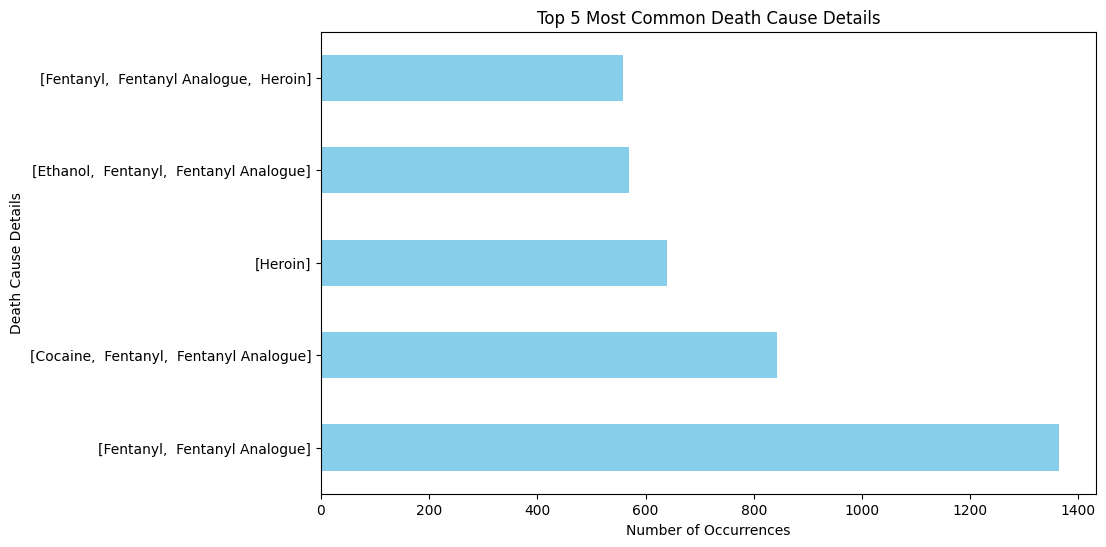

In [76]:
# Vẽ biểu đồ cho 5 nguyên nhân gây tử vong phổ biến nhất
plt.figure(figsize=(10, 6))
top_5_death_causes.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Common Death Cause Details')
plt.xlabel('Number of Occurrences')
plt.ylabel('Death Cause Details')
plt.show()

**Nhận xét:**
- Các nguyên nhân từ cao xuống thấp là:
    - Fentanyl, Fentanyl Analog, Heroin
    - Ethanol, Fentanyl, Fentanyl Analog
    - Heroin
    - Cocaine, Fentanyl, Fentanyl Analog
    - Fentanyl, Fentanyl Analog
- Nguyên nhân hàng đầu gây tử vong là sự kết hợp của Fentanyl, Fentanyl Analog và Heroin với số lần xuất hiện gần 1400 lần. Các nguyên nhân khác cũng chứa Fentanyl và các chất analog của nó, cho thấy rằng Fentanyl là một vấn đề lớn trong các trường hợp tử vong liên quan đến ma túy.
- Heroin và Ethanol cũng được nhắc đến như là các nguyên nhân chính

# 4. Meaningful Questions

In [77]:
DrugDeath_df["Details Cause"]

0                                                [Cocaine]
1                [Fentanyl,  Fentanyl Analogue,  Xylazine]
2        [Ethanol,  Fentanyl,  Fentanyl Analogue,  Morp...
3                                                [Ethanol]
4              [Fentanyl,  Fentanyl Analogue,  Gabapentin]
                               ...                        
10649                                             [Heroin]
10650                                          [Methadone]
10651                                            [Cocaine]
10652                                              [Other]
10653                                   [Cocaine,  Heroin]
Name: Details Cause, Length: 10654, dtype: object

## 4.2 Question 2: Các thuốc gây nguyên nhân tử vong cao nhất cho từng nhóm tuổi và sự chuyển biến của nó theo độ tuổi?

- Lợi ích của câu hỏi:
    - Có cái nhìn sâu hơn về các vấn đề sức khỏe và nguyên nhân gây tử vong ở mỗi nhóm độ tuổi cụ thể.
    - Hỗ trợ việc đưa ra các chính sách y tế cụ thể nhằm giảm thiểu nguy cơ tử vong, tăng cường giám sát và cải thiện chăm sóc sức khỏe cho từng nhóm tuổi.
    - Phát hiện ra những đặc điểm, xu hướng đặc trưng của từng nhóm tuổi trong việc sử dụng và ảnh hưởng của các loại thuốc khác nhau.

In [78]:
DrugDeath_df_copy = DrugDeath_df.copy()
DrugDeath_df_copy = DrugDeath_df_copy.explode('Details Cause')

### Step 1: Phân loại cột "Age" thành các nhóm độ tuổi theo quy định quốc tế

In [79]:
# Phân loại độ tuổi thành 3 nhóm
def classify_age_group(age):
    if age > 55:
        return 'Người già'
    elif 35 <= age <= 55:
        return 'Người trung niên'
    elif 18 <= age <= 34:
        return 'Người thanh niên'
    elif 14 <= age <= 17:
        return 'Người vị thành niên'
    else:
        return 'Người thiếu nhi'

DrugDeath_df_copy['Age Group'] = DrugDeath_df_copy['Age'].apply(classify_age_group)

### Step 2: Tìm mỗi loại thuốc gây tử vong cao nhất ở mỗi độ tuổi

In [80]:
# Nhóm theo Age Group và Details Death, đếm số lần xuất hiện của mỗi loại thuốc
top_drugs_by_age = DrugDeath_df_copy.groupby(['Age Group', 'Details Cause']).size().reset_index(name='count')

# Tìm loại thuốc gây tử vong nhiều nhất trong mỗi nhóm tuổi
top_drugs_by_age = top_drugs_by_age.loc[top_drugs_by_age.groupby('Age Group')['count'].idxmax()]

# Đổi tên cột 'Details Cause' thành 'Name of Drug'
top_drugs_by_age = top_drugs_by_age.rename(columns={'Details Cause': 'Name of Drug'})

print(top_drugs_by_age)

               Age Group        Name of Drug  count
5              Người già   Fentanyl Analogue   1288
37      Người thanh niên   Fentanyl Analogue   1972
66       Người thiếu nhi   Fentanyl Analogue      1
73      Người trung niên   Fentanyl Analogue   3414
104  Người vị thành niên   Fentanyl Analogue     13


- Ta thấy, ở tất cả 5 nhóm độ tuổi, loại thuốc gây tử vong cao nhất đều là `Fentanyl Analogue`. Do đó ta không cần phải vẽ mỗi loại thuốc gây tử vong cao nhất cho từng độ tuổi để minh họa sự chuyển biến của loại thuốc đó lên các độ tuổi còn lại. Mà ta chỉ cần vẽ một đồ thị để minh họa tác động của loại thuốc `Fentanyl Analogue` lên 5 nhóm tuổi mà ta đã phân loại trước đó.

### Step 3: Minh họa bằng biểu đồ đường

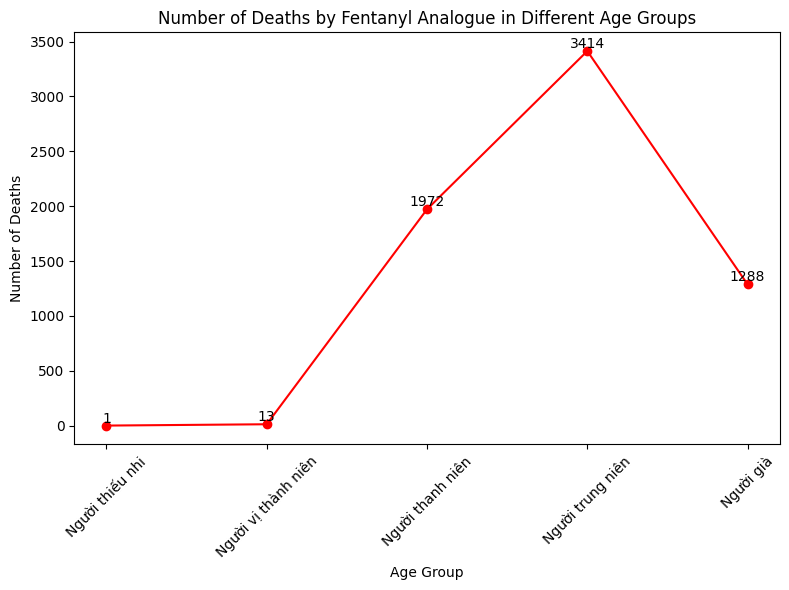

In [81]:
age_groups = ['Người thiếu nhi', 'Người vị thành niên', 'Người thanh niên', 'Người trung niên', 'Người già']

# Lấy dữ liệu cho biểu đồ
deaths_by_age_group = [top_drugs_by_age[top_drugs_by_age['Age Group'] == age]['count'].values[0] for age in age_groups]
# Vẽ biểu đồ đường
plt.figure(figsize=(8, 6))
plt.plot(age_groups, deaths_by_age_group, marker='o', linestyle='-', color='red')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Fentanyl Analogue in Different Age Groups')
plt.xticks(rotation=45)

# Thêm chú thích số lên mỗi điểm
for i, txt in enumerate(deaths_by_age_group):
    plt.text(age_groups[i], txt, str(txt), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Nhận xét:
    - Ta thấy mặc dù ở mỗi nhóm tuổi khác nhau, thì loại thuốc `Fentanyl Analogue` đều gây tử vong nhiều nhất.
    - Tuy nhiên, ta cũng có thể nhìn thấy được, ở nhóm tuổi `Người Trung Niên` có mức độ tử vong cao nhất gây ra bởi loại thuốc `Fentanyl Analogue` so với các nhóm tuổi khác.
    - Ở các nhóm tuổi có sức lao động cao lại có xu hướng dễ bị tử vong vì sốc thuốc.
    - Ở đây, ta thêm vào nhóm tuổi là thiếu nhi chỉ mang tính chất tượng trưng, tuy nhiên, ở trong dữ liệu này cũng đã xuất hiện có một ca tử vong. Và có thể xu hướng này có thể tăng thêm nữa.  

# Reflection

# References